# Predicting Student Test Scores Competition
The following notebook contains my attempt at the Predicting Student Test Scores competitions: https://www.kaggle.com/competitions/playground-series-s6e1/overview

### Data Dictionary

| Variable | Definition | Key |
| :--- | :--- | :--- |
| **id** | Unique student identifier | |
| **age** | Age of the student | Years (e.g., 17 - 24) |
| **gender** | Biological sex | female, male, other |
| **course** | Degree program enrolled | B.Sc, B.Tech, BCA, BA, B.Com, Diploma |
| **study_hours** | Daily self-study time | Continuous (Hours) |
| **class_attendance** | Percentage of classes attended | 0 to 100 (%) |
| **internet_access** | Availability of home internet | no, yes |
| **sleep_hours** | Average nightly sleep | Continuous (Hours) |
| **sleep_quality** | Subjective quality of rest | poor, average, good |
| **study_method** | Primary learning approach | online videos, self-study, coaching, group study, mixed |
| **facility_rating** | Quality of study facilities | low, medium, high |
| **exam_difficulty** | Complexity level of the exam | easy, moderate, hard |
| **exam_score** | **Target:** Result on the exam | 0.0 to 100.0 |

# Section 1 - View Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.columns

Index(['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [4]:
train_df

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599
629998,629998,20,male,b.com,1.54,75.1,yes,8.2,average,group study,high,moderate,59.100


In [5]:
train_df.columns

Index(['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [7]:
train_df[train_df.isnull()].count()

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [8]:
train_df.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


In [9]:
train_df.describe(include=['O'])

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,630000,630000,630000,630000,630000,630000,630000
unique,3,7,2,3,5,3,3
top,other,b.tech,yes,poor,coaching,medium,moderate
freq,211097,131236,579423,213675,131697,214082,353982


In [10]:
train_df.duplicated().sum()

np.int64(0)

## Section 2 - Feature Engineering

In [11]:
train_df

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599
629998,629998,20,male,b.com,1.54,75.1,yes,8.2,average,group study,high,moderate,59.100


In [12]:
ordinal_binary_cat = ["sleep_quality", "facility_rating", "exam_difficulty", "internet_access"]

for col in ordinal_binary_cat:
    print(f"VARIABLE: {col}")
    print(train_df[col].unique())

VARIABLE: sleep_quality
['average' 'poor' 'good']
VARIABLE: facility_rating
['low' 'medium' 'high']
VARIABLE: exam_difficulty
['easy' 'moderate' 'hard']
VARIABLE: internet_access
['no' 'yes']


In [13]:
sleep_quality_map = {
    "poor": 1,
    "average": 2,
    "good": 3
}

facility_rating_map = {
    "low": 1,
    "medium": 2,
    "high": 3
}

exam_difficulty_map = {
    "easy": 1,
    "moderate": 2,
    "hard": 3
}

internet_access_map = {
    "no": 1,
    "yes": 2
}


mappings = [sleep_quality_map, facility_rating_map, exam_difficulty_map, internet_access_map]

for i in range(4):
    train_df[ordinal_binary_cat[i]] = train_df[ordinal_binary_cat[i]].map(mappings[i])

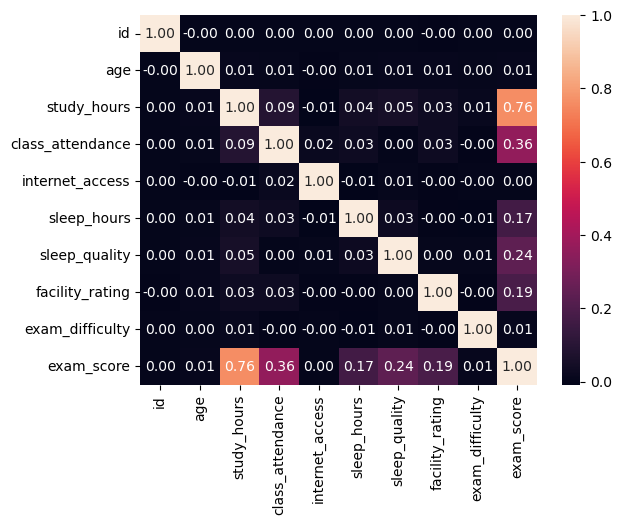

In [15]:
sns.heatmap(train_df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

### Section 2.1 - Age

In [16]:
# test score by age
train_df.groupby(["age"], as_index=False)['exam_score'].mean()

,age,exam_score
0,17,62.492596
1,18,62.077583
2,19,61.738998
3,20,62.537688
4,21,62.843004
5,22,63.137706
6,23,62.876142
7,24,62.305521


<Axes: xlabel='age', ylabel='exam_score'>

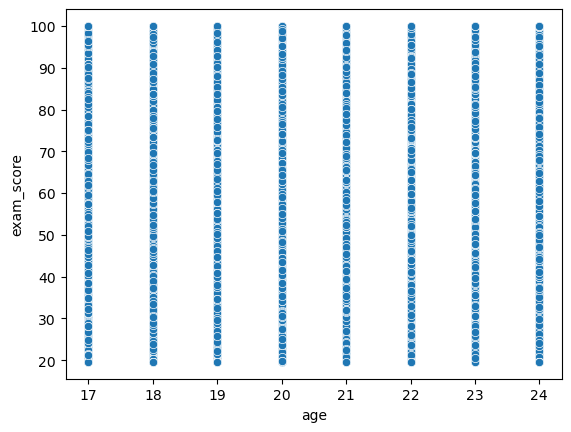

In [17]:
sns.scatterplot(data=train_df, x="age", y="exam_score")

In [18]:
age_df = train_df[["age","exam_score"]]
age_df.groupby(["age"]).median()

,exam_score
age,
17,62.6
18,62.5
19,61.9
20,62.5
21,62.5
22,63.5
23,62.9
24,62.4


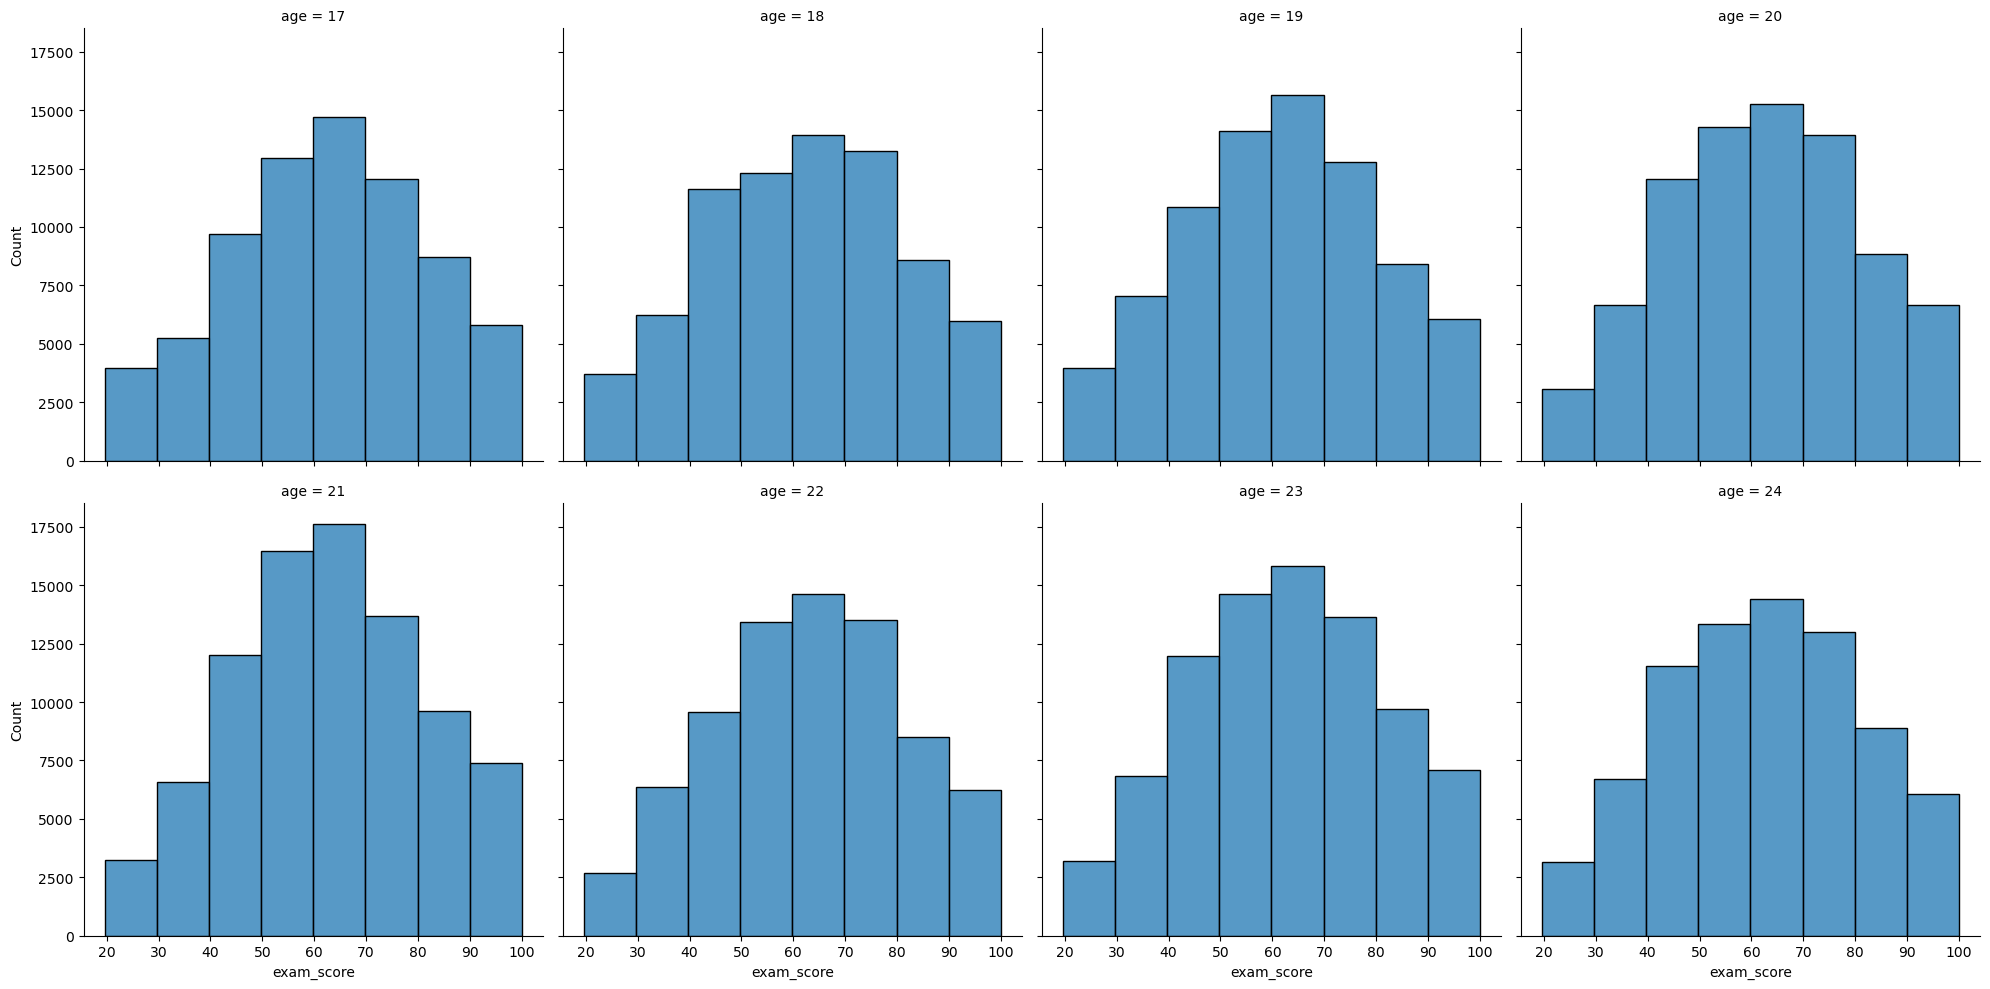

In [19]:
sns.displot(train_df, x='exam_score', col='age', col_wrap=4, binwidth=10, height=5)
plt.show()

### Section 2.2 - Gender

In [20]:
# test score by gender
train_df.groupby(["gender"], as_index=False)['exam_score'].mean()

,gender,exam_score
0,female,62.563220
1,male,62.175561
2,other,62.781191


### Section 2.3 - Course

In [21]:
# test score by course
train_df.groupby(["course"], as_index=False)['exam_score'].mean()

,course,exam_score
0,b.com,62.537726
1,b.sc,62.295491
2,b.tech,62.519707
3,ba,61.886931
4,bba,63.232038
5,bca,62.586227
6,diploma,62.404354


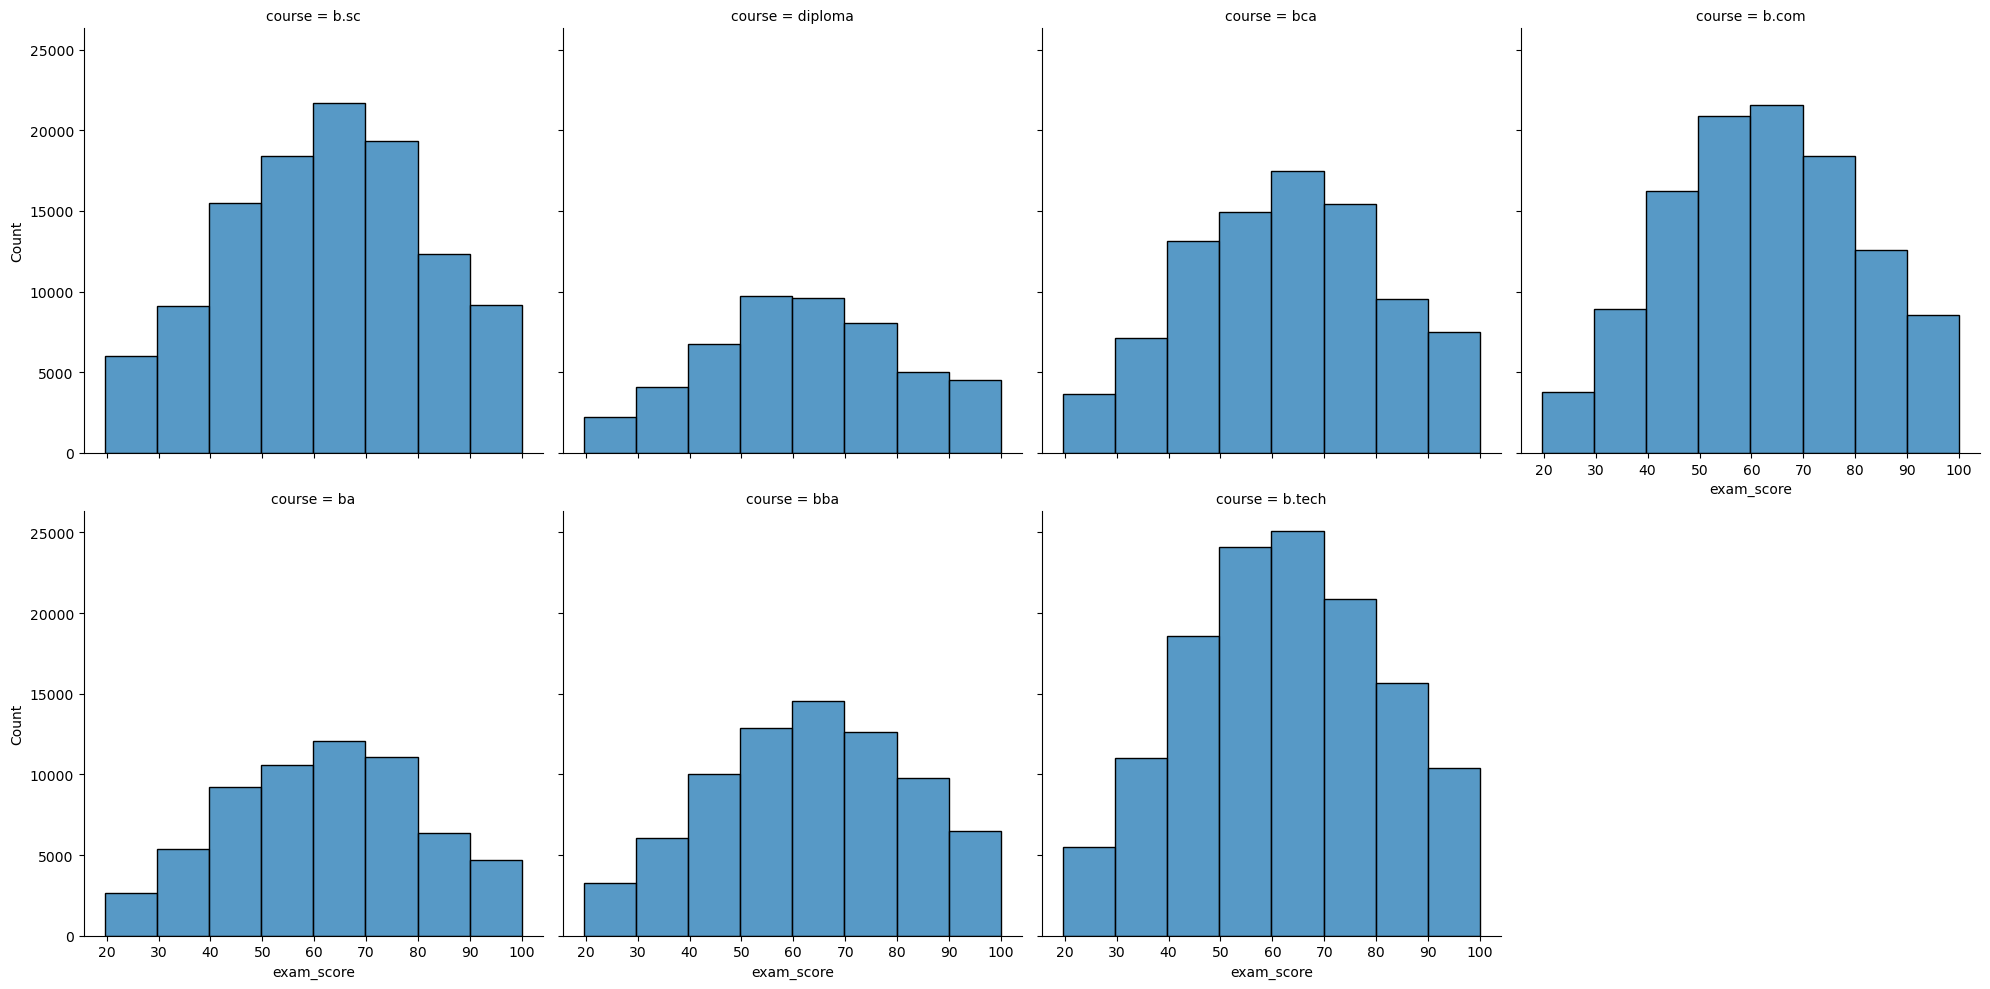

In [22]:
sns.displot(train_df, x='exam_score', col='course', col_wrap=4, binwidth=10, height=5)
plt.show()

### Section 2.4 - sleep_hours

### Section 2.5 - study_hours

In [23]:
# test score by hours studied
train_df.groupby(["study_hours"], as_index=False)['exam_score'].mean()

,study_hours,exam_score
0,0.08,37.893864
1,0.09,39.767688
2,0.10,41.479822
3,0.11,38.900569
4,0.12,37.287698
...,...,...
787,7.87,82.368864
788,7.88,84.377333
789,7.89,83.481399
790,7.90,88.449755


In [24]:
train_df["study_hours_sq"] = train_df["study_hours"] **2

In [25]:
train_df['study_hours_cut'] = pd.qcut(train_df['study_hours'], 8)
study_df = train_df.groupby(["study_hours_cut"], as_index=False, observed=True)['exam_score'].mean()
study_df

,study_hours_cut,exam_score
0,"(0.079, 0.96]",41.347702
1,"(0.96, 1.97]",45.852268
2,"(1.97, 2.96]",52.879728
3,"(2.96, 4.0]",59.639389
4,"(4.0, 4.98]",66.084476
5,"(4.98, 6.05]",72.123660
6,"(6.05, 7.1]",78.307988
7,"(7.1, 7.91]",84.040877


In [26]:
bins = [0, 0.96, 1.97, 2.96, 4.0, 4.98, 6.05, 7.1, 7.91]
labels = [0,1,2,3,4,5,6,7]

train_df['study_group'] = pd.cut(train_df['study_hours'], bins=bins, labels=labels, right=True)
test_df['study_group']  = pd.cut(test_df['study_hours'], bins=bins, labels=labels, right=True)

<Axes: xlabel='log_study_hours', ylabel='exam_score'>

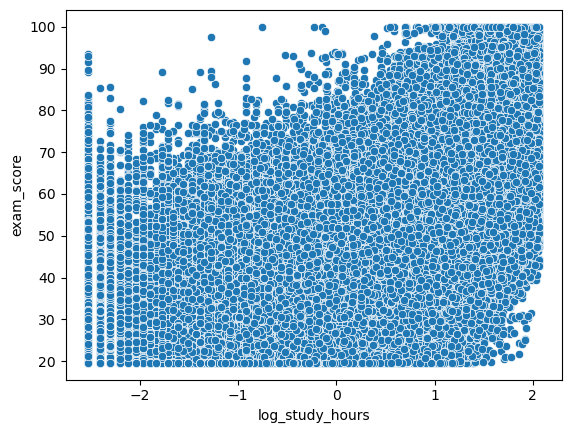

In [27]:
train_df["log_study_hours"] = np.log(train_df["study_hours"])
sns.scatterplot(train_df, x="log_study_hours", y="exam_score")

<Axes: xlabel='study_efficiency', ylabel='exam_score'>

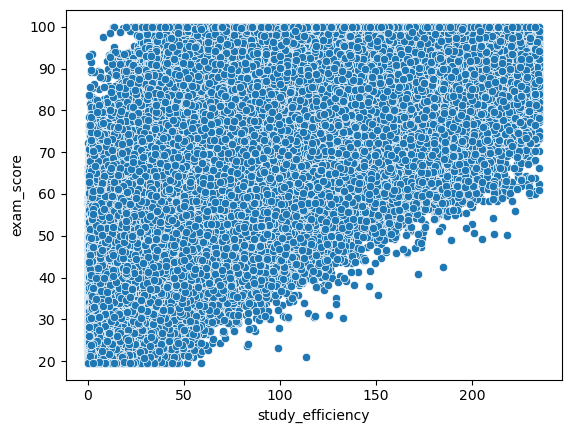

In [28]:
train_df["study_efficiency"] = train_df["study_hours"] * train_df["sleep_hours"] * train_df["sleep_quality"]
sns.scatterplot(train_df, x="study_efficiency", y="exam_score")

<Axes: xlabel='log_study_efficiency', ylabel='exam_score'>

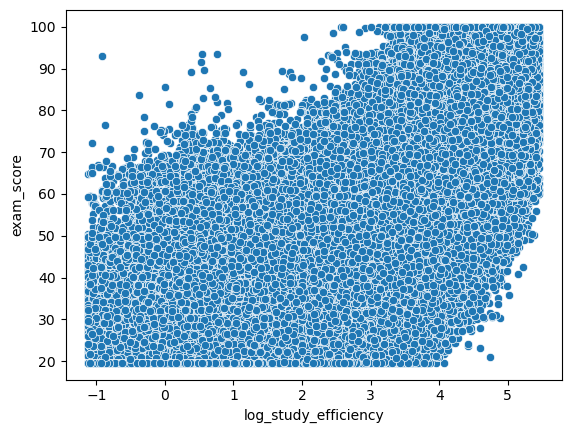

In [29]:
train_df["log_study_efficiency"] = np.log(train_df["study_hours"] * train_df["sleep_hours"] *  train_df["sleep_quality"])
sns.scatterplot(train_df, x="log_study_efficiency", y="exam_score")

In [30]:
train_df["sleep_study_ratio"] = train_df["study_hours"] / train_df["sleep_hours"]

In [31]:
train_df["burnout_indicator"] = np.where(
    (train_df["sleep_quality"] == 1) & (train_df["sleep_study_ratio"] > 1.9), 1, 0
)

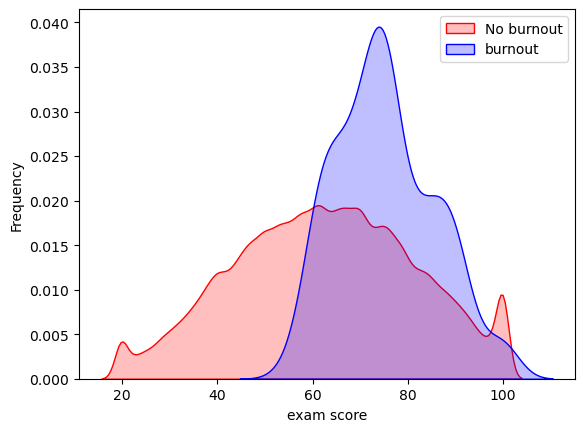

In [32]:
plot = sns.kdeplot(train_df['exam_score'][(train_df['burnout_indicator']==0)], color='Red', fill=True)
plot = sns.kdeplot(train_df['exam_score'][(train_df['burnout_indicator']==1)], color='Blue', ax=plot, fill=True)
plot.set_xlabel('exam score')
plot.set_ylabel('Frequency')
plot = plot.legend(['No burnout', 'burnout'])

In [33]:
train_df["optimal_studying_indicator"] = np.where(
    (train_df["sleep_quality"] == 3) & (train_df["sleep_study_ratio"] > 1.4), 1, 0
)

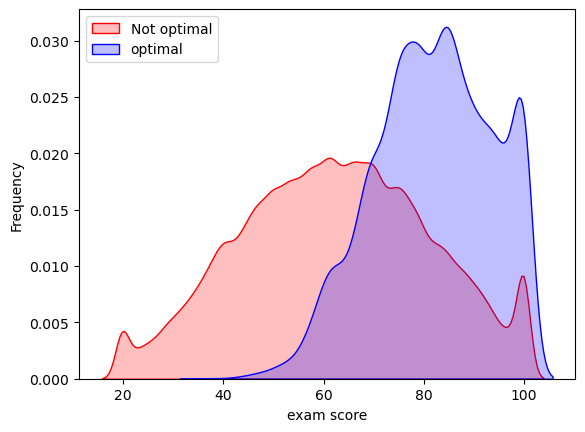

In [34]:
plot = sns.kdeplot(train_df['exam_score'][(train_df['optimal_studying_indicator']==0)], color='Red', fill=True)
plot = sns.kdeplot(train_df['exam_score'][(train_df['optimal_studying_indicator']==1)], color='Blue', ax=plot, fill=True)
plot.set_xlabel('exam score')
plot.set_ylabel('Frequency')
plot = plot.legend(['Not optimal', 'optimal'])

In [35]:
train_df.describe()

,id,age,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,study_hours_sq,log_study_hours,study_efficiency,log_study_efficiency,sleep_study_ratio,burnout_indicator,optimal_studying_indicator
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,1.919719,7.072758,1.999070,1.985971,1.877679,62.506672,21.587731,1.060247,57.771928,3.579220,0.601150,0.000365,0.013989
std,181865.479132,2.260238,2.359880,17.430098,0.271728,1.744811,0.823045,0.812399,0.650509,18.916884,19.574672,1.023407,48.174937,1.179129,0.396883,0.019104,0.117445
min,0.000000,17.000000,0.080000,40.600000,1.000000,4.100000,1.000000,1.000000,1.000000,19.599000,0.006400,-2.525729,0.328000,-1.114742,0.008081,0.000000,0.000000
25%,157499.750000,19.000000,1.970000,57.000000,2.000000,5.600000,1.000000,1.000000,1.000000,48.800000,3.880900,0.678034,20.400000,3.015535,0.278571,0.000000,0.000000
50%,314999.500000,21.000000,4.000000,72.600000,2.000000,7.100000,2.000000,2.000000,2.000000,62.600000,16.000000,1.386294,44.555000,3.796724,0.566667,0.000000,0.000000
75%,472499.250000,23.000000,6.050000,87.200000,2.000000,8.600000,3.000000,3.000000,2.000000,76.300000,36.602500,1.800058,83.664000,4.426809,0.852727,0.000000,0.000000
max,629999.000000,24.000000,7.910000,99.400000,2.000000,9.900000,3.000000,3.000000,3.000000,100.000000,62.568100,2.068128,234.927000,5.459275,1.929268,1.000000,1.000000


In [36]:
train_df[train_df["exam_score"] == 100].describe()

,id,age,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,study_hours_sq,log_study_hours,study_efficiency,log_study_efficiency,sleep_study_ratio,burnout_indicator,optimal_studying_indicator
count,15458.000000,15458.000000,15458.000000,15458.000000,15458.000000,15458.000000,15458.000000,15458.000000,15458.000000,15458.0,15458.000000,15458.000000,15458.000000,15458.000000,15458.000000,15458.000000,15458.000000
mean,314578.781537,20.746021,7.141599,85.792852,1.912537,7.867609,2.454716,2.423147,1.879221,100.0,51.700512,1.957783,137.211364,4.840583,0.956876,0.000453,0.046125
std,181577.384554,2.241643,0.835540,12.443006,0.282521,1.624161,0.692047,0.701720,0.653322,0.0,10.958775,0.134912,50.388920,0.427413,0.269325,0.021276,0.209763
min,4.000000,17.000000,0.470000,40.600000,1.000000,4.100000,1.000000,1.000000,1.000000,100.0,0.220900,-0.755023,12.972000,2.562793,0.051087,0.000000,0.000000
25%,157483.250000,19.000000,6.700000,78.500000,2.000000,6.500000,2.000000,2.000000,1.000000,100.0,44.890000,1.902108,100.716000,4.612305,0.781111,0.000000,0.000000
50%,314958.000000,21.000000,7.430000,89.500000,2.000000,8.300000,3.000000,3.000000,2.000000,100.0,55.204900,2.005526,136.884000,4.919134,0.881430,0.000000,0.000000
75%,472032.750000,23.000000,7.800000,96.300000,2.000000,9.300000,3.000000,3.000000,2.000000,100.0,60.840000,2.054124,176.382000,5.172652,1.097990,0.000000,0.000000
max,629950.000000,24.000000,7.910000,99.400000,2.000000,9.900000,3.000000,3.000000,3.000000,100.0,62.568100,2.068128,234.927000,5.459275,1.929268,1.000000,1.000000


In [37]:
train_df[train_df["exam_score"] <= 20].describe()

,id,age,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,study_hours_sq,log_study_hours,study_efficiency,log_study_efficiency,sleep_study_ratio,burnout_indicator,optimal_studying_indicator
count,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.000000,7052.0,7052.0
mean,311640.718945,19.877623,0.641404,53.778559,1.907969,6.047591,1.334657,1.354935,1.912791,19.619223,0.884106,-1.094442,4.995479,0.890156,0.111770,0.0,0.0
std,182857.358753,2.288676,0.687586,11.912643,0.289090,1.501694,0.591172,0.628654,0.657411,0.075629,1.717414,1.211559,6.144353,1.262718,0.126917,0.0,0.0
min,111.000000,17.000000,0.080000,40.600000,1.000000,4.100000,1.000000,1.000000,1.000000,19.599000,0.006400,-2.525729,0.328000,-1.114742,0.008081,0.0,0.0
25%,153303.250000,18.000000,0.080000,44.300000,2.000000,5.000000,1.000000,1.000000,1.000000,19.599000,0.006400,-2.525729,0.744000,-0.295714,0.016327,0.0,0.0
50%,308198.000000,19.000000,0.380000,49.500000,2.000000,5.600000,1.000000,1.000000,2.000000,19.599000,0.144400,-0.967584,2.590500,0.951848,0.062324,0.0,0.0
75%,470781.750000,22.000000,1.010000,60.000000,2.000000,6.900000,2.000000,2.000000,2.000000,19.599000,1.020100,0.009950,6.944000,1.937878,0.167517,0.0,0.0
max,629997.000000,24.000000,4.810000,99.400000,2.000000,9.900000,3.000000,3.000000,3.000000,20.000000,23.136100,1.570697,58.752000,4.073325,1.173171,0.0,0.0


In [38]:
# variables that have an impact - study_hours, class_attendance, sleep_hours, sleep_quality, facility_rating
train_df["overall_score"] = train_df["study_hours"] * train_df["class_attendance"] * train_df["sleep_hours"] * train_df["sleep_quality"] * train_df["facility_rating"]

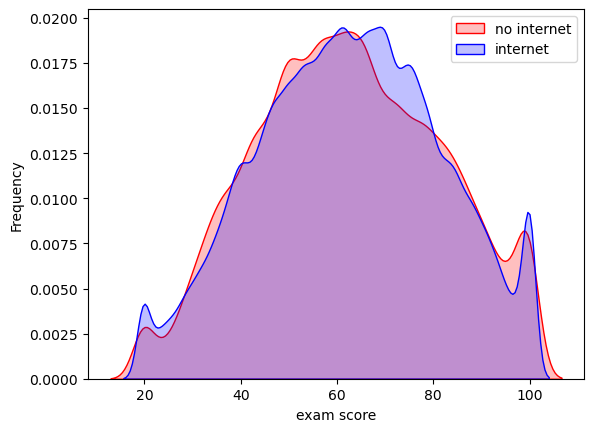

In [42]:
plot = sns.kdeplot(train_df['exam_score'][(train_df['internet_access']==1)], color='Red', fill=True)
plot = sns.kdeplot(train_df['exam_score'][(train_df['internet_access']==2)], color='Blue', ax=plot, fill=True)
plot.set_xlabel('exam score')
plot.set_ylabel('Frequency')
plot = plot.legend(['no internet', 'internet'])

In [46]:
train_df["study_facility_quality"] = train_df["study_hours"] * train_df["facility_rating"]

In [64]:
train_df["studying_attendence_ratio"] = train_df["study_hours"] * (train_df["class_attendance"] / 100)

In [54]:
train_df["student_effort"] = 2 * (
    (train_df["study_hours"] * train_df["class_attendance"]) / (train_df["study_hours"] + train_df["class_attendance"]))

In [55]:
correlations = train_df[["study_hours", "class_attendance", "student_effort", "exam_score"]].corr()
print(correlations["exam_score"].sort_values(ascending=False))

ERROR! Session/line number was not unique in database. History logging moved to new session 665
exam_score          1.000000
student_effort      0.770651
study_hours         0.762267
class_attendance    0.360954
Name: exam_score, dtype: float64


In [61]:
numeric_columns = train_df.select_dtypes(include="number")
correlations = numeric_columns.corr()
print(correlations["exam_score"].sort_values(ascending=False))

exam_score                    1.000000
studying_attendance_ratio     0.796722
student_effort                0.770651
study_hours                   0.762267
study_hours_sq                0.735844
log_study_efficiency          0.707319
study_efficiency              0.690367
study_facility_quality        0.685998
facility_quality              0.685998
overall_score                 0.683437
log_study_hours               0.667704
sleep_study_ratio             0.619084
class_attendance              0.360954
sleep_quality                 0.236895
facility_rating               0.188159
sleep_hours                   0.167410
optimal_studying_indicator    0.121528
burnout_indicator             0.012848
age                           0.010472
exam_difficulty               0.008773
internet_access               0.000447
id                            0.000372
Name: exam_score, dtype: float64


In [63]:
numeric_columns = train_df.select_dtypes(include="number")
correlations = numeric_columns.corr()
print(correlations["exam_score"].sort_values(ascending=False))

exam_score                    1.000000
studying_attendence_ratio2    0.796722
studying_attendance_ratio     0.796722
student_effort                0.770651
study_hours                   0.762267
study_hours_sq                0.735844
log_study_efficiency          0.707319
study_efficiency              0.690367
study_facility_quality        0.685998
facility_quality              0.685998
overall_score                 0.683437
log_study_hours               0.667704
sleep_study_ratio             0.619084
class_attendance              0.360954
sleep_quality                 0.236895
facility_rating               0.188159
sleep_hours                   0.167410
optimal_studying_indicator    0.121528
burnout_indicator             0.012848
age                           0.010472
exam_difficulty               0.008773
internet_access               0.000447
id                            0.000372
Name: exam_score, dtype: float64


In [65]:
# One-hot encode specific categorical columns
train_df = pd.get_dummies(train_df, columns=["study_method", "course", "gender"], dtype=int)

# View the new columns
print(train_df.columns)

Index(['id', 'age', 'study_hours', 'class_attendance', 'internet_access',
       'sleep_hours', 'sleep_quality', 'facility_rating', 'exam_difficulty',
       'exam_score', 'study_hours_sq', 'study_hours_cut', 'study_group',
       'log_study_hours', 'study_efficiency', 'log_study_efficiency',
       'sleep_study_ratio', 'burnout_indicator', 'optimal_studying_indicator',
       'overall_score', 'facility_quality', 'study_facility_quality',
       'studying_attendance_ratio', 'student_effort',
       'studying_attendence_ratio2', 'studying_attendence_ratio',
       'study_method_coaching', 'study_method_group study',
       'study_method_mixed', 'study_method_online videos',
       'study_method_self-study', 'course_b.com', 'course_b.sc',
       'course_b.tech', 'course_ba', 'course_bba', 'course_bca',
       'course_diploma', 'gender_female', 'gender_male', 'gender_other'],
      dtype='object')


In [66]:
numeric_columns = train_df.select_dtypes(include="number")
correlations = numeric_columns.corr()
print(correlations["exam_score"].sort_values(ascending=False))

exam_score                    1.000000
studying_attendence_ratio     0.796722
studying_attendence_ratio2    0.796722
studying_attendance_ratio     0.796722
student_effort                0.770651
study_hours                   0.762267
study_hours_sq                0.735844
log_study_efficiency          0.707319
study_efficiency              0.690367
facility_quality              0.685998
study_facility_quality        0.685998
overall_score                 0.683437
log_study_hours               0.667704
sleep_study_ratio             0.619084
class_attendance              0.360954
sleep_quality                 0.236895
facility_rating               0.188159
study_method_coaching         0.183712
sleep_hours                   0.167410
optimal_studying_indicator    0.121528
study_method_mixed            0.067598
course_bba                    0.014164
burnout_indicator             0.012848
age                           0.010472
gender_other                  0.010302
exam_difficulty          

## Feature Selection

To reduce multicolinearity, features must be chosen that are different from each other, so the model can distinguish which features are causing an impact. 